# Importing Libraries and Reading Data

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# MODELLING
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier


# DATA VALIDATION AND METRIC.
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import recall_score, roc_auc_score, make_scorer, roc_curve,log_loss, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest,chi2,f_regression, f_classif
from sklearn.decomposition import PCA
from sklearn.calibration import calibration_curve



# HIDING AND MAGIC COMMANDS
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [21]:
data = pd.read_csv('Preprocessed_data.csv')

In [22]:
data.head()

,accountsapid,Single_Order,2019,2020,2021,Churn_Rule_year_wise,Churn_Rule_avg_cycle,Median_Days,3_years_cycle,Final_Churn,...,FirstOrderedDate_Year,FirstOrderedDate_Month,FirstOrderedDate_Week,FirstOrderedDate_Day,FirstOrderedDate_Dayofweek,LastOrderedDate_Year,LastOrderedDate_Month,LastOrderedDate_Week,LastOrderedDate_Day,LastOrderedDate_Dayofweek
0,17876.0,0,1,0,0,1,2,73.0,219.0,1,...,2019,9,36,3,1,2019,11,46,15,4
1,17882.0,0,1,1,1,0,1,20.0,60.0,0,...,2019,1,5,29,1,2021,6,22,4,4
2,17985.0,0,1,1,1,0,1,174.0,522.0,0,...,2019,2,6,7,3,2021,6,24,18,4
3,22286.0,0,1,1,1,0,1,21.0,63.0,0,...,2019,1,3,17,3,2021,5,20,20,3
4,19780.0,0,1,1,1,0,1,42.0,126.0,0,...,2019,3,9,1,4,2021,3,13,31,2


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   accountsapid                   9396 non-null   float64
 1   Single_Order                   9396 non-null   int64  
 2   2019                           9396 non-null   int64  
 3   2020                           9396 non-null   int64  
 4   2021                           9396 non-null   int64  
 5   Churn_Rule_year_wise           9396 non-null   int64  
 6   Churn_Rule_avg_cycle           9396 non-null   int64  
 7   Median_Days                    9396 non-null   float64
 8   3_years_cycle                  9396 non-null   float64
 9   Final_Churn                    9396 non-null   int64  
 10  TotalOrderNumber               9396 non-null   float64
 11  NumQtrsPerOrder                9396 non-null   float64
 12  OrderChannel_NonDigital        9396 non-null   i

In [5]:
data['TotalOrderNumber'].head()

0     2.0
1    33.0
2     5.0
3    36.0
4    16.0
Name: TotalOrderNumber, dtype: float64

# Questions Asked

### Reason why purchase cycle is long ?
- Let us firstly see the distribution of the Median Data(Average Purchase Cycle).


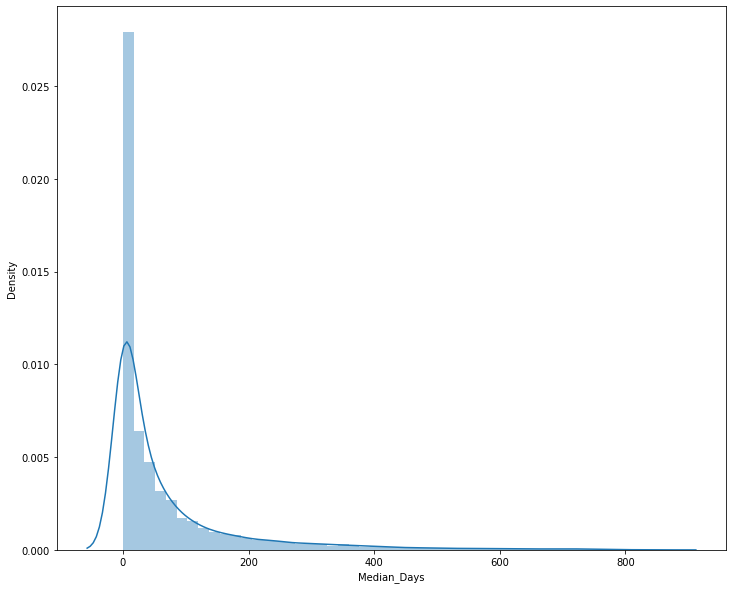

In [6]:
fig = plt.figure(figsize=(12,10))
sns.distplot(data['Median_Days']);

In [7]:
quantiles = np.linspace(0.1,1,20)
for quant in quantiles:
    value=data['Median_Days'].quantile(quant)
    print(f'At {quant} quantile value is {value}')

At 0.1 quantile value is 0.0
At 0.1473684210526316 quantile value is 0.0
At 0.19473684210526315 quantile value is 0.0
At 0.24210526315789474 quantile value is 0.0
At 0.2894736842105263 quantile value is 0.0
At 0.33684210526315794 quantile value is 0.0
At 0.38421052631578945 quantile value is 4.0
At 0.43157894736842106 quantile value is 11.0
At 0.4789473684210527 quantile value is 18.0
At 0.5263157894736842 quantile value is 25.0
At 0.5736842105263158 quantile value is 32.0
At 0.6210526315789474 quantile value is 41.0
At 0.6684210526315789 quantile value is 52.0
At 0.7157894736842105 quantile value is 66.0
At 0.7631578947368421 quantile value is 84.0
At 0.8105263157894737 quantile value is 110.0
At 0.8578947368421053 quantile value is 150.0
At 0.9052631578947369 quantile value is 215.0
At 0.9526315789473684 quantile value is 332.0
At 1.0 quantile value is 855.0


**Observations:**
- About **80%** of the people have **Average purchase cycle** less than **100 Days**.
- About **20%** of the people have **Average Purchase cycle** greater than **100 Days**.
- Let us Observe the number of people who are **Churning** where the **Average purchase cycle** greater than **100 Days**.

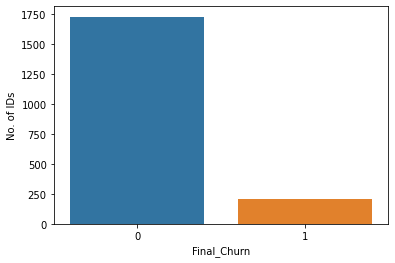

In [8]:
sns.countplot(data[data['Median_Days']>100]['Final_Churn']);
plt.ylabel('No. of IDs');

**Observations:**
- **logically** persons who have **Average purchase cycle** greater than **100 Days should Churn** but according to the **Churn_Rule_avg_cycle** he would be saved as the **Difference in today's Date and his purchase would be higher**.
- About **90%** of the people who have **Average purchase cycle** greater than **100 Days** should actually **churn** but are being saved due to **Second Rule**.

- Let us look at their total order patterns

In [9]:
median_greater_100_days_data = data[data['Median_Days']>100]

In [10]:
median_greater_100_days_data.head()

,accountsapid,Single_Order,2019,2020,2021,Churn_Rule_year_wise,Churn_Rule_avg_cycle,Median_Days,3_years_cycle,Final_Churn,...,FirstOrderedDate_Year,FirstOrderedDate_Month,FirstOrderedDate_Week,FirstOrderedDate_Day,FirstOrderedDate_Dayofweek,LastOrderedDate_Year,LastOrderedDate_Month,LastOrderedDate_Week,LastOrderedDate_Day,LastOrderedDate_Dayofweek
2,17985.0,0,1,1,1,0,1,174.0,522.0,0,...,2019,2,6,7,3,2021,6,24,18,4
10,18851.0,0,1,1,1,0,1,117.0,351.0,0,...,2019,1,5,31,3,2021,6,23,8,1
26,20719.0,0,1,0,1,1,1,757.0,2271.0,0,...,2019,2,7,14,3,2021,3,10,12,4
28,19642.0,0,1,0,0,1,2,181.0,543.0,1,...,2019,4,17,23,1,2019,10,43,21,0
31,21603.0,0,0,1,1,0,1,166.0,498.0,0,...,2020,9,39,23,2,2021,3,10,8,0


In [64]:
median_greater_100_days_data.groupby(by='FirstOrderedDate_Month').mean()['TotalOrderNumber']

FirstOrderedDate_Month
1     3.731884
2     3.562992
3     3.548000
4     3.496241
5     3.381215
6     3.000000
7     3.090909
8     3.030534
9     2.801653
10    2.644628
11    2.702128
12    2.711538
Name: TotalOrderNumber, dtype: float64

In [65]:
data[data['Median_Days']<100].groupby(by='FirstOrderedDate_Month')['TotalOrderNumber'].mean()

FirstOrderedDate_Month
1     43.514414
2     10.183983
3      6.781523
4      5.730032
5      4.798214
6      5.115596
7      6.137097
8      4.279891
9      3.175234
10     3.471178
11     3.989583
12     3.139004
Name: TotalOrderNumber, dtype: float64

**Conclusion:**
- **Average number of orders per month** by the customers whose **Avg purcahse cycle** > 100 are **more than** that of the people whose **avg purchase cycle is less than 100**.
- This Clearly is an Anamoly.

# Behaviour of the Model Probabilites
- Checking the Behaviour of Model probabilites with respect to change in sampling proportions.

### 50-50% Sample proportions w.r.t Classes.

In [24]:
predictors = data.drop(['Final_Churn','accountsapid'],axis=1)
target = data['Final_Churn']
train_X, test_X, train_y, test_y = train_test_split(predictors, target, test_size=0.2, random_state=1)
LR_kbest = ['Single_Order', '2020', '2021', 'Churn_Rule_year_wise',
       'Churn_Rule_avg_cycle', 'Median_Days', '3_years_cycle',
       'NumQtrsPerOrder', 'OrderChannel_NonDigital',
       'OrderChannel_EProcurement', 'OrderChannel_ECommerce', 'Recency',
       'RFM_Score', 'Average_years_taken_per order', 'Orders year wise',
       'FirstOrderedDate_Year', 'FirstOrderedDate_Month',
       'FirstOrderedDate_Week', 'LastOrderedDate_Year',
       'LastOrderedDate_Month', 'LastOrderedDate_Week', 'LastOrderedDate_Day',
       'LastOrderedDate_Dayofweek']
test_X['Target']=test_y

- Proportions of the Classes in the Target are primarily kept to **50:50 ratio.**

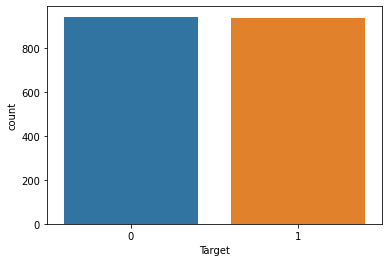

In [67]:
sns.countplot(test_X['Target']);

In [51]:
test_X['Target'].value_counts()

0    943
1    937
Name: Target, dtype: int64

In [81]:
final_Logistic_Model = LogisticRegression(C=0.015)
final_Logistic_Model.fit(train_X[LR_kbest], train_y)

LogisticRegression(C=0.015)

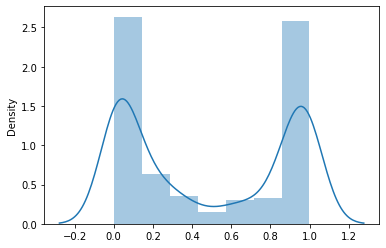

In [84]:
LR_y_pred = final_Logistic_Model.predict_proba(test_X[LR_kbest])
a = [i[1] for i in LR_y_pred]
sns.distplot(a);

- This looks like a **50-50% portion** where we see **Two peaks** in the probability distribution.
- Lets try to resample the sample to a **70-30%** split.
### 70-30% Sample proportions w.r.t Classes.

In [85]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = test_X[test_X.Target==0] #I classified negative class as '0'
df_minority = test_X[test_X.Target==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=False,       # sample with replacement
                                 n_samples=360,    # to match majority class
                                 random_state=123)   # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled], axis=0, ignore_index=True)

# Display new class counts
df_upsampled['Target'].value_counts()

0    943
1    360
Name: Target, dtype: int64

In [86]:
final_Logistic_Model = LogisticRegression(C=0.015)
final_Logistic_Model.fit(train_X[LR_kbest], train_y)

LogisticRegression(C=0.015)

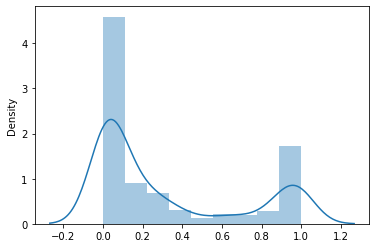

In [118]:
LR_y_pred = final_Logistic_Model.predict_proba(df_upsampled[LR_kbest])
a_1 = [i[1] for i in LR_y_pred]
b_0 = [i[0] for i in LR_y_pred]
sns.distplot(a_1);

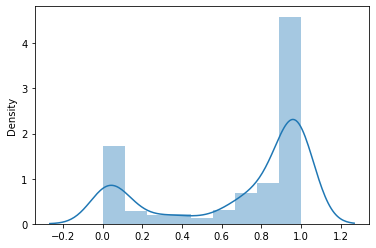

In [111]:
sns.distplot(b_0);

In [117]:
LR_y_pred = final_Logistic_Model.predict(df_upsampled[LR_kbest])
recall_scores = recall_score(df_upsampled['Target'], LR_y_pred)
print(f'Recall Score on the imbalanced test Set is = {recall_scores}')
print('\n Value_Counts for the Test Target')
print(test_y.value_counts())
print('\n Value_Counts for the Predictions')
print(pd.Series(LR_y_pred).value_counts())

Recall Score on the imbalanced test Set is = 0.9416666666666667

 Value_Counts for the Test Target
0    943
1    937
Name: Final_Churn, dtype: int64

 Value_Counts for the Predictions
0    951
1    352
dtype: int64


- This looks like the peak on the other side got depreciated.
- **Conclusion:**
- **Peaks in the Distribution is totally dependent on the Proportion of the sample.**

- The Below plot is the **Ideal Line plot** for probabilities for their **Probabilites vs Loss plot**

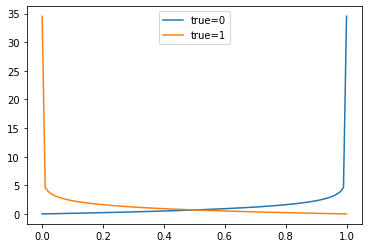

In [74]:
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]
# plot input to loss
plt.plot(yhat, losses_0, label='true=0')
plt.plot(yhat, losses_1, label='true=1')
plt.legend()
plt.show()

- Our Model Predictions follow the same Ideal plot and further we can Prove the hypothesis that our model predicted probabilites are valid ones.

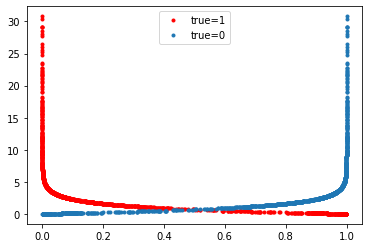

In [122]:
yhat = [x*0.01 for x in range(0, len(LR_y_pred))]
# evaluate predictions for a 0 true value
# evaluate predictions for a 1 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in LR_y_pred]
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in LR_y_pred]
# plot input to loss
plt.plot(a_1, losses_1,'r.', label='true=1')
plt.plot(b_0, losses_1,'.', label='true=0')
plt.legend()
plt.show()

# Multiple transaction users 

In [54]:
new_data = pd.read_csv('Preprocessed_data.csv')


In [55]:
MultipleTrans_users = new_data.groupby('Single_Order').get_group(0)

In [90]:
median_greater_100_days_data = MultipleTrans_users[MultipleTrans_users['Median_Days']<100]
median_greater_100_days_data.groupby(by='FirstOrderedDate_Month').mean()['TotalOrderNumber']
#MultipleTrans_users[MultipleTrans_users['Median_Days']<100].groupby(by='FirstOrderedDate_Month')['TotalOrderNumber'].mean()

FirstOrderedDate_Month
1     53.377269
2     15.308600
3     12.368550
4     11.784672
5     10.068376
6     12.079208
7     11.431694
8      8.203593
9      6.584337
10     7.105590
11     8.111801
12     6.813559
Name: TotalOrderNumber, dtype: float64

# Questions Asked

### Reason why purchase cycle is long ?
- Let us firstly see the distribution of the Median Data(Average Purchase Cycle).


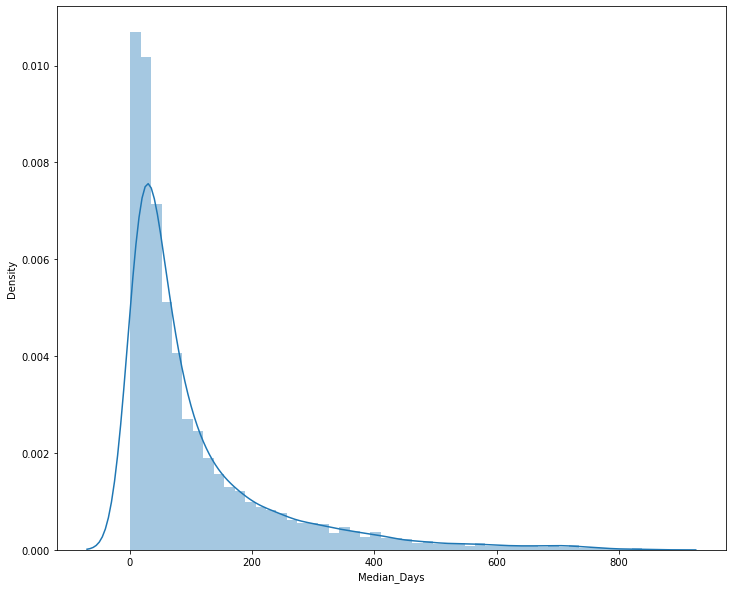

In [56]:
fig = plt.figure(figsize=(12,10))
sns.distplot(MultipleTrans_users['Median_Days']);

- Single transaction users will not have average purchase cycle 

In [88]:
MultipleTrans_users.query('Median_Days>100')['Final_Churn'].value_counts()

0    1728
1     206
Name: Final_Churn, dtype: int64

In [89]:
206 / (1728 + 206)

0.10651499482936919

In [16]:
quantiles = np.linspace(0.1,1,20)
for quant in quantiles:
    value=MultipleTrans_users['Median_Days'].quantile(quant)
    print(f'At {quant} quantile value is {value}')

At 0.1 quantile value is 11.0
At 0.1473684210526316 quantile value is 15.0
At 0.19473684210526315 quantile value is 20.0
At 0.24210526315789474 quantile value is 24.0
At 0.2894736842105263 quantile value is 28.0
At 0.33684210526315794 quantile value is 34.0
At 0.38421052631578945 quantile value is 39.0
At 0.43157894736842106 quantile value is 45.0
At 0.4789473684210527 quantile value is 53.0
At 0.5263157894736842 quantile value is 61.0
At 0.5736842105263158 quantile value is 71.0
At 0.6210526315789474 quantile value is 83.0
At 0.6684210526315789 quantile value is 98.0
At 0.7157894736842105 quantile value is 117.0
At 0.7631578947368421 quantile value is 142.86842105263167
At 0.8105263157894737 quantile value is 177.0
At 0.8578947368421053 quantile value is 224.0
At 0.9052631578947369 quantile value is 293.0
At 0.9526315789473684 quantile value is 404.0
At 1.0 quantile value is 855.0


In [92]:
predictors = MultipleTrans_users.drop(['Final_Churn','accountsapid'],axis=1)
target = MultipleTrans_users['Final_Churn']
train_X, test_X, train_y, test_y = train_test_split(predictors, target, test_size=0.2, random_state=1)
LR_kbest = ['Single_Order', '2020', '2021', 'Churn_Rule_year_wise',
       'Churn_Rule_avg_cycle', 'Median_Days', '3_years_cycle',
       'NumQtrsPerOrder', 'OrderChannel_NonDigital',
       'OrderChannel_EProcurement', 'OrderChannel_ECommerce', 'Recency',
       'RFM_Score', 'Average_years_taken_per order', 'Orders year wise',
       'FirstOrderedDate_Year', 'FirstOrderedDate_Month',
       'FirstOrderedDate_Week', 'LastOrderedDate_Year',
       'LastOrderedDate_Month', 'LastOrderedDate_Week', 'LastOrderedDate_Day',
       'LastOrderedDate_Dayofweek']
test_X['Target']=test_y


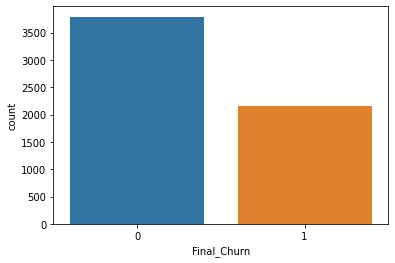

In [93]:
sns.countplot(target);

- As we can see when users are doing multiple transactions then ***churn rate*** is low i.e ***36%***

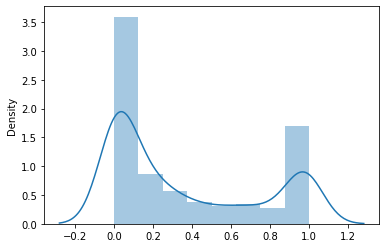

In [94]:
final_Logistic_Model = LogisticRegression(C=0.015)
final_Logistic_Model.fit(train_X[LR_kbest], train_y)

LR_y_pred = final_Logistic_Model.predict_proba(test_X[LR_kbest])
a = [i[1] for i in LR_y_pred]
sns.distplot(a);

- **Peaks in the Distribution is totally dependent on the Proportion of the sample.**

In [95]:
LR_y_pred = final_Logistic_Model.predict(test_X[LR_kbest])
recall_scores = recall_score(test_y, LR_y_pred)
print(accuracy_score(test_y, LR_y_pred))
print(f'Recall Score on the imbalanced test Set is = {recall_scores}')
print('\n Value_Counts for the Test Target')
print(test_y.value_counts())
print('\n Value_Counts for the Predictions')
print(pd.Series(LR_y_pred).value_counts())

0.9276094276094277
Recall Score on the imbalanced test Set is = 0.8537735849056604

 Value_Counts for the Test Target
0    764
1    424
Name: Final_Churn, dtype: int64

 Value_Counts for the Predictions
0    802
1    386
dtype: int64


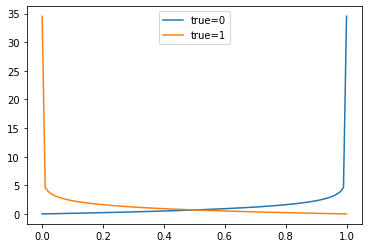

In [60]:
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]
# plot input to loss
plt.plot(yhat, losses_0, label='true=0')
plt.plot(yhat, losses_1, label='true=1')
plt.legend()
plt.show()

In [61]:
LR_y_pred = final_Logistic_Model.predict_proba(test_X[LR_kbest])
a_1 = [i[1] for i in LR_y_pred]
b_0 = [i[0] for i in LR_y_pred]

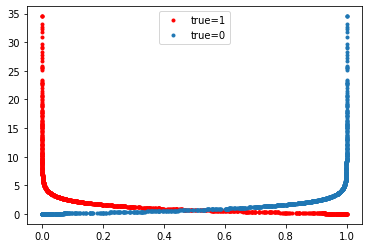

In [62]:
yhat = [x*0.01 for x in range(0, len(LR_y_pred))]
# evaluate predictions for a 0 true value
# evaluate predictions for a 1 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in LR_y_pred]
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in LR_y_pred]
# plot input to loss
plt.plot(a_1, losses_1,'r.', label='true=1')
plt.plot(b_0, losses_1,'.', label='true=0')
plt.legend()
plt.show()

- Our Model Predictions follow the same Ideal plot and further we can Prove the hypothesis that our model predicted probabilites are valid ones.

In [63]:
def plot_caliberative_curve(test_y,pred_y):
    """
    Description : Calibration curve tells you how much off are the probabilities returned by the model
    from the ideal frequentist probabilities
    
    Parameter : test data, predicted data
    
    Output: caliberative curve  
    """
    plt.rcParams.update({'font.size': 10})
    frac_of_positives, pred_prob = calibration_curve(test_y,pred_y[:,-1], n_bins=10)
    sns.lineplot(x=pred_prob, y=frac_of_positives)
    plt.plot([0,1],[0,1])
    plt.grid(linestyle='-', linewidth=0.2)
    plt.title("Probability vs Fraction of Positives")
    xlabel = plt.xlabel("Probability of positive")
    ylabel = plt.ylabel("Fraction of positives")
    ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
    xticks = plt.xticks(ticks)
    yticks = plt.yticks(ticks)
    

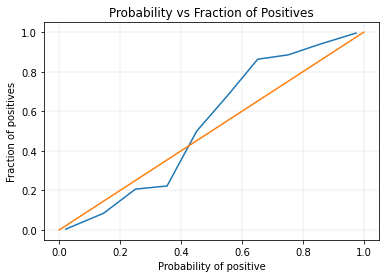

In [64]:
LR_y_pred = final_Logistic_Model.predict_proba(test_X[LR_kbest])
plot_caliberative_curve(test_y,LR_y_pred)


- Calibration curve tells you how much off are the probabilities returned by the model from the ideal frequentist probabilities

- Ideally, all points should be ***on the diagonal***. That would mean the model is ***perfectly calibrated*** and its probability estimates are trustworthy.In this Blue line is approximate to diagonal .

- Training a calibration model requires having a separate validation set or performing cross-validation to avoid overfitting.

- As ***More features*** contributing to the ***model*** then more the chances of the calliberative curve to ***become diagonal*** 
  and then it will justify our probability score more 
- If we are increassing ***Regularization parameter*** then it is also ending somewhere towards diagonal but in that case overfitting problem could rise . But after increasing the regularization parameter then at some point it
  will move away from the diagonal

# Single transaction


In [65]:
SingTraans_users = new_data.groupby('Single_Order').get_group(1)


In [75]:
predictors = SingTraans_users.drop(['Final_Churn','accountsapid'],axis=1)
target = SingTraans_users['Final_Churn']
train_X, test_X, train_y, test_y = train_test_split(predictors, target, test_size=0.2, random_state=1)
LR_kbest = ['Single_Order', '2020', '2021', 'Churn_Rule_year_wise',

       'NumQtrsPerOrder', 'OrderChannel_NonDigital',
       'OrderChannel_EProcurement', 'OrderChannel_ECommerce', 'Recency',
       'RFM_Score', 'Average_years_taken_per order', 'Orders year wise',
       'FirstOrderedDate_Year', 'FirstOrderedDate_Month',
       'FirstOrderedDate_Week', 'LastOrderedDate_Year',
       'LastOrderedDate_Month', 'LastOrderedDate_Week', 'LastOrderedDate_Day',
       'LastOrderedDate_Dayofweek']
test_X['Target']=test_y



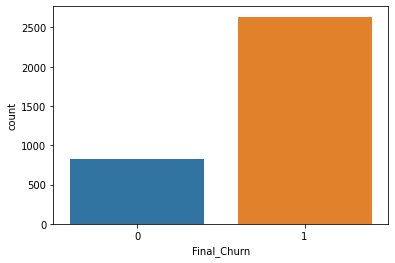

In [76]:
sns.countplot(target);

- So From this countplot we can say that our single transaction users are more likely to churn out and according  to data ***76% users*** are churning out 

### Data is imbalance so it will give bias result 

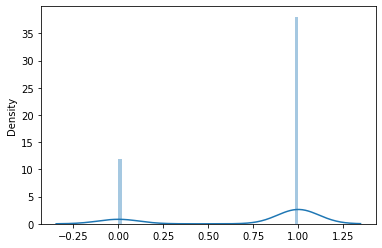

In [77]:
final_Logistic_Model = LogisticRegression(C=0.015)
final_Logistic_Model.fit(train_X[LR_kbest], train_y)

LR_y_pred = final_Logistic_Model.predict_proba(test_X[LR_kbest])
a = [i[1] for i in LR_y_pred]
sns.distplot(a);

In [78]:
LR_y_pred = final_Logistic_Model.predict(test_X[LR_kbest])
recall_scores = recall_score(test_y, LR_y_pred)
print(f'Recall Score on the imbalanced test Set is = {recall_scores}')
print('\n Value_Counts for the Test Target')
print(test_y.value_counts())
print('\n Value_Counts for the Predictions')
print(pd.Series(LR_y_pred).value_counts())

Recall Score on the imbalanced test Set is = 1.0

 Value_Counts for the Test Target
1    527
0    165
Name: Final_Churn, dtype: int64

 Value_Counts for the Predictions
1    527
0    165
dtype: int64


In [79]:
LR_y_pred = final_Logistic_Model.predict_proba(test_X[LR_kbest])
a_1 = [i[1] for i in LR_y_pred]
b_0 = [i[0] for i in LR_y_pred]


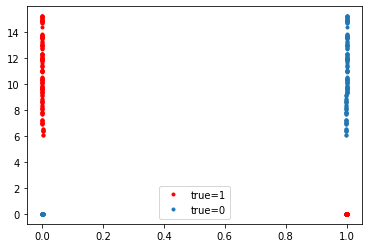

In [80]:
yhat = [x*0.01 for x in range(0, len(LR_y_pred))]
# evaluate predictions for a 0 true value
# evaluate predictions for a 1 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in LR_y_pred]
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in LR_y_pred]
# plot input to loss
plt.plot(a_1, losses_1,'r.', label='true=1')
plt.plot(b_0, losses_1,'.', label='true=0')
plt.legend()
plt.show()

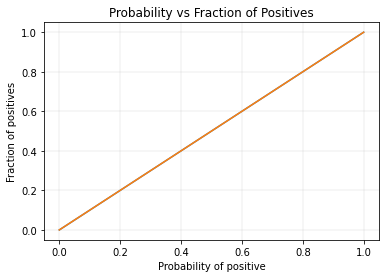

In [81]:
LR_y_pred = final_Logistic_Model.predict_proba(test_X[LR_kbest])
plot_caliberative_curve(test_y,LR_y_pred)
